In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random

In [2]:
# 10000 of stars with 20 obsrvations of CCF (121 numbers)
input = np.load('random/input_correct.npy')
input.shape

(10000, 20, 121)

In [3]:
# time, rv, fwhm, bis
label = np.load('random/label_correct.npy')
label.shape

(10000, 4, 20)

(10000, 20)
1.0212735649894071 39.668153280357465


(array([8.0000e+01, 5.9000e+01, 1.3500e+02, 2.6100e+02, 3.3000e+02,
        4.9600e+02, 1.0770e+03, 1.4210e+03, 1.9040e+03, 2.8860e+03,
        3.7050e+03, 4.9310e+03, 6.5330e+03, 7.8690e+03, 1.0489e+04,
        1.3680e+04, 1.5739e+04, 2.2336e+04, 3.0282e+04, 1.5223e+04,
        1.3190e+04, 1.1489e+04, 8.9900e+03, 6.8670e+03, 5.8940e+03,
        4.1400e+03, 3.1830e+03, 2.5310e+03, 1.6440e+03, 1.0840e+03,
        5.9600e+02, 3.7000e+02, 2.1000e+02, 1.3900e+02, 8.2000e+01,
        6.3000e+01, 4.4000e+01, 8.0000e+00, 1.0000e+01, 3.0000e+01]),
 array([-156.48201002, -147.80964782, -139.13728562, -130.46492343,
        -121.79256123, -113.12019903, -104.44783683,  -95.77547463,
         -87.10311243,  -78.43075023,  -69.75838803,  -61.08602583,
         -52.41366363,  -43.74130144,  -35.06893924,  -26.39657704,
         -17.72421484,   -9.05185264,   -0.37949044,    8.29287176,
          16.96523396,   25.63759616,   34.30995835,   42.98232055,
          51.65468275,   60.32704495,   68.999

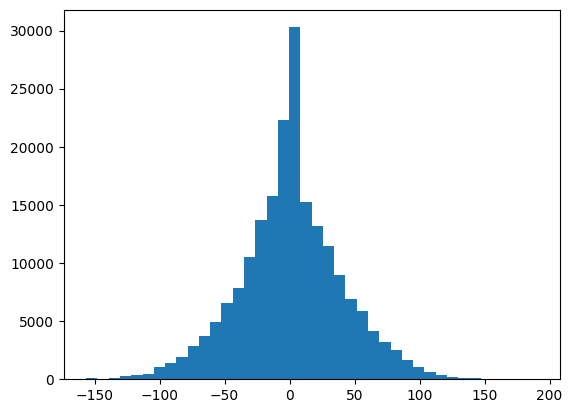

In [4]:
# true rv for each of 20 observations of 10000 stars
rv_label = label[:, 1, :]
print(rv_label.shape)
print(rv_label.mean(), rv_label.std())
plt.hist(rv_label.flatten(), bins=40)

(10000, 20)


(array([4854., 5069., 5142., 4849., 4889., 4991., 5020., 5022., 5048.,
        4929., 4898., 5126., 5019., 5205., 5071., 5135., 5190., 4924.,
        4983., 5056., 5012., 4919., 5060., 5023., 4849., 4883., 4918.,
        4970., 4884., 4864., 4987., 5021., 5066., 5022., 5104., 5054.,
        5083., 5025., 4873., 4963.]),
 array([9.88552948e-06, 1.21748339e-01, 2.43486792e-01, 3.65225245e-01,
        4.86963698e-01, 6.08702151e-01, 7.30440604e-01, 8.52179057e-01,
        9.73917510e-01, 1.09565596e+00, 1.21739442e+00, 1.33913287e+00,
        1.46087132e+00, 1.58260978e+00, 1.70434823e+00, 1.82608668e+00,
        1.94782513e+00, 2.06956359e+00, 2.19130204e+00, 2.31304049e+00,
        2.43477895e+00, 2.55651740e+00, 2.67825585e+00, 2.79999431e+00,
        2.92173276e+00, 3.04347121e+00, 3.16520967e+00, 3.28694812e+00,
        3.40868657e+00, 3.53042502e+00, 3.65216348e+00, 3.77390193e+00,
        3.89564038e+00, 4.01737884e+00, 4.13911729e+00, 4.26085574e+00,
        4.38259420e+00, 4.5043

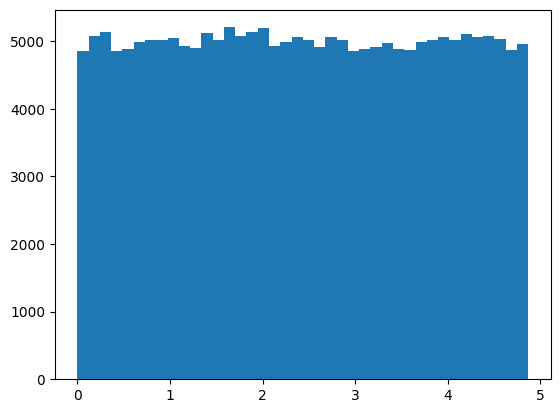

In [5]:
# time for each of 20 observations of 10000 stars
times = label[:, 0, :]
print(times.shape)
plt.hist(times.flatten(), bins=40)

Text(0, 0.5, 'RV')

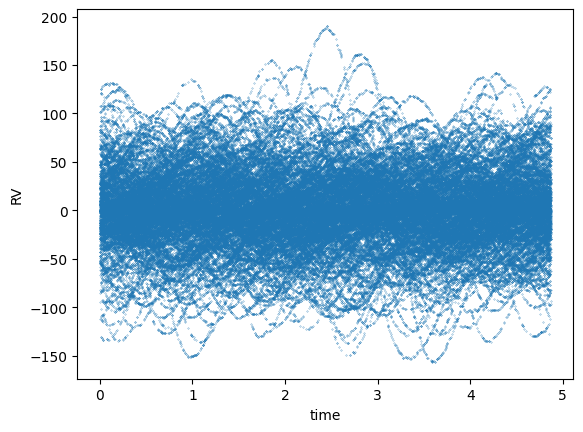

In [6]:
# we plot RV agains times
plt.scatter(times.flatten(), rv_label.flatten(), s=0.05)
plt.xlabel('time')
plt.ylabel('RV')

In [7]:
rotation_period = 4.8696
times_sin = np.sin(2 * np.pi / rotation_period * times)
times_cos = np.cos(2 * np.pi / rotation_period * times)
print(times_sin.shape, times_cos.shape)

(10000, 20) (10000, 20)


In [8]:
# Calculate mean CCF plot for each star
mean_ccf_per_star = np.mean(input, axis=1)
mean_ccf_per_star.shape

(10000, 121)

In [9]:
# Subtract mean CCF plot from each observation
residual_ccf = input - mean_ccf_per_star[:, np.newaxis, :]  # Shape: (10000, 20, 121)
residual_ccf.shape

(10000, 20, 121)

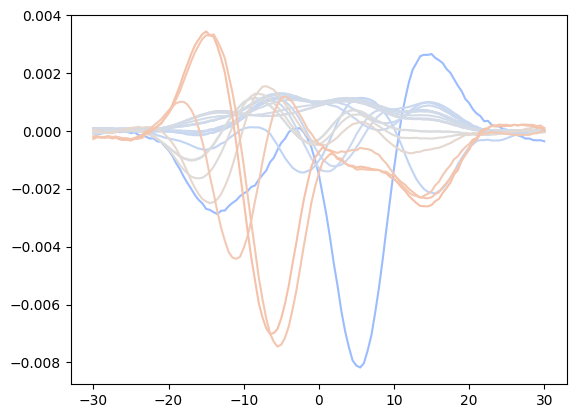

In [10]:
rvs = np.linspace(-30, 30, num=121)
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(vmin=np.min(rv_label), vmax=np.max(rv_label))

s = 0
for i in range(20):
    color = cmap(norm(rv_label[s][i]))
    plt.plot(rvs, residual_ccf[s, i, :], color=color)
plt.show()

Train/Validation/Train split 70/20/10

In [11]:
# Split data into train (70%), validation (20%), and test (10%) sets
random.seed(123)
train_size = 0.7
val_size = 0.2
test_size = 0.1

# Flatten the indices
total_size = len(residual_ccf)
indices = list(range(total_size))

# Split indices for train and temp (val + test)
train_indices, temp_indices = train_test_split(indices, train_size=train_size)

# Split temp indices for validation and test
val_indices, test_indices = train_test_split(temp_indices, test_size=test_size / (val_size + test_size))

Standartization of the input data

In [12]:
# Standardization along axis representing data points within each CCF plot (axis=2)
# axis 0 - standardization along all stars, axis 1 - standardization along all observations for each stars
# note: we only use data from train sample for calculating mean and std and then apply transformation for all data
mean_val = np.mean(residual_ccf[train_indices], axis=(0, 1), keepdims=True)
std_val = np.std(residual_ccf[train_indices], axis=(0, 1), keepdims=True)
standardized_residual_ccf = (residual_ccf - mean_val) / std_val
standardized_residual_ccf.shape

(10000, 20, 121)

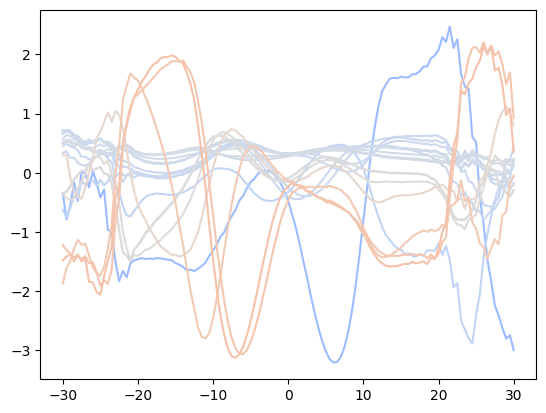

In [13]:
s = 0
for i in range(20):
    color = cmap(norm(rv_label[s][i]))
    plt.plot(rvs, standardized_residual_ccf[s, i, :], color=color)
plt.show()

Standartization of true labels

1.0237952015331253 39.80580533880809


(array([6.4000e+01, 5.0000e+01, 9.4000e+01, 1.8000e+02, 2.1600e+02,
        3.4800e+02, 7.6800e+02, 1.0400e+03, 1.3510e+03, 2.0220e+03,
        2.6030e+03, 3.4700e+03, 4.5720e+03, 5.4990e+03, 7.4230e+03,
        9.6380e+03, 1.0897e+04, 1.5530e+04, 2.0964e+04, 1.0610e+04,
        9.2490e+03, 8.0790e+03, 6.4120e+03, 4.8920e+03, 4.1300e+03,
        2.8640e+03, 2.2320e+03, 1.8230e+03, 1.1290e+03, 7.4400e+02,
        4.3600e+02, 2.6000e+02, 1.4600e+02, 9.6000e+01, 5.6000e+01,
        4.6000e+01, 3.3000e+01, 4.0000e+00, 7.0000e+00, 2.3000e+01]),
 array([-3.95685513, -3.73898837, -3.5211216 , -3.30325483, -3.08538806,
        -2.86752129, -2.64965452, -2.43178775, -2.21392098, -1.99605421,
        -1.77818744, -1.56032067, -1.34245391, -1.12458714, -0.90672037,
        -0.6888536 , -0.47098683, -0.25312006, -0.03525329,  0.18261348,
         0.40048025,  0.61834702,  0.83621379,  1.05408055,  1.27194732,
         1.48981409,  1.70768086,  1.92554763,  2.1434144 ,  2.36128117,
         2.57914

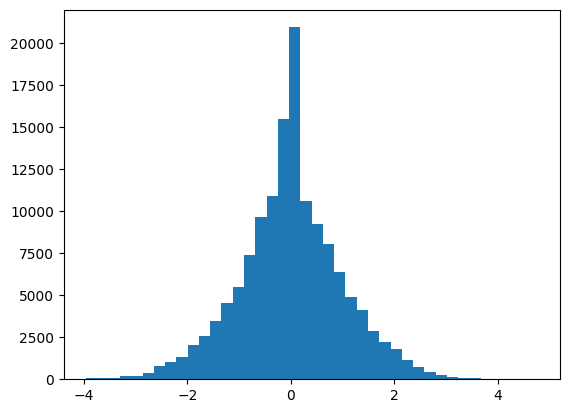

In [14]:
# extimely important only use train data to avoid dala leakage 
mean_train_rv = rv_label[train_indices].mean()
std_train_rv = rv_label[train_indices].std()
print(mean_train_rv, std_train_rv)
plt.hist(((rv_label[train_indices] - mean_train_rv) / std_train_rv).flatten(), bins=40)

(array([8.0000e+01, 5.9000e+01, 1.3500e+02, 2.6100e+02, 3.3000e+02,
        4.9600e+02, 1.0770e+03, 1.4210e+03, 1.9040e+03, 2.8860e+03,
        3.7050e+03, 4.9310e+03, 6.5330e+03, 7.8690e+03, 1.0489e+04,
        1.3680e+04, 1.5739e+04, 2.2336e+04, 3.0282e+04, 1.5223e+04,
        1.3190e+04, 1.1489e+04, 8.9900e+03, 6.8670e+03, 5.8940e+03,
        4.1400e+03, 3.1830e+03, 2.5310e+03, 1.6440e+03, 1.0840e+03,
        5.9600e+02, 3.7000e+02, 2.1000e+02, 1.3900e+02, 8.2000e+01,
        6.3000e+01, 4.4000e+01, 8.0000e+00, 1.0000e+01, 3.0000e+01]),
 array([-3.95685513, -3.73898837, -3.5211216 , -3.30325483, -3.08538806,
        -2.86752129, -2.64965452, -2.43178775, -2.21392098, -1.99605421,
        -1.77818744, -1.56032067, -1.34245391, -1.12458714, -0.90672037,
        -0.6888536 , -0.47098683, -0.25312006, -0.03525329,  0.18261348,
         0.40048025,  0.61834702,  0.83621379,  1.05408055,  1.27194732,
         1.48981409,  1.70768086,  1.92554763,  2.1434144 ,  2.36128117,
         2.57914

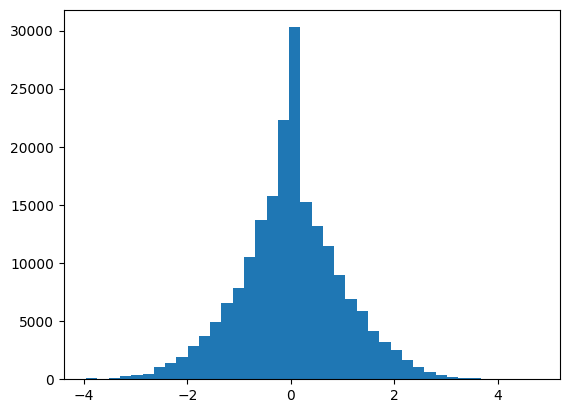

In [15]:
rv_norm = (rv_label - mean_train_rv) / std_train_rv
plt.hist(rv_norm.flatten(), bins=40)